In [1]:
!pip install pandas

In [49]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [50]:
stack = pd.read_csv('survey_results_public.csv')

In [51]:
stack.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [52]:
max_value= stack['ConvertedCompYearly'].max()
max_value

74351432.0

In [53]:
min_value= stack['ConvertedCompYearly'].min()
min_value

1.0

In [55]:
avg_value= stack['ConvertedCompYearly'].mean()
avg_value

103110.08171765343

In [56]:
missing_value= stack.isnull()
missing_value

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
89180,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
89181,False,False,False,False,False,True,True,False,False,True,...,True,True,True,True,True,True,True,False,False,True
89182,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True


In [57]:
missing_value_comp= stack['ConvertedCompYearly'].isnull().sum()
missing_value_comp

41165

In [58]:
total_data =len(stack)
total_data

89184

In [59]:
missing_value_comp/len(stack)*100

46.15738249013276

In [67]:
stack_new = stack.dropna(subset='ConvertedCompYearly').copy()
stack_new

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,89163,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,60-120 minutes a day,60-120 minutes a day,Automated testing;Developer portal or other ce...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,50719.0
89166,89167,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Contribute to open-source projects;Professiona...,Some college/university study without earning ...,Books / Physical media;Hackathons (virtual or ...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Continuous integ...,Financial Services,Appropriate in length,Neither easy nor difficult,16917.0
89167,89168,I agree,I am a developer by professio

In [68]:
stack_new.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment                12
                       ...  
ProfessionalTech       16293
Industry               20272
SurveyLength             509
SurveyEase               471
ConvertedCompYearly        0
Length: 84, dtype: int64

In [69]:
stack_new.shape

(48019, 84)

<Axes: ylabel='Frequency'>

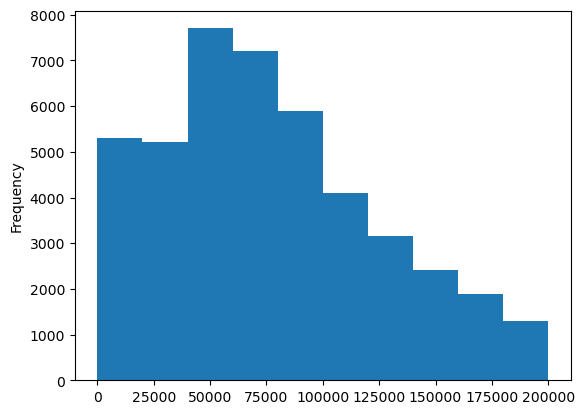

In [70]:
stack_new[stack_new.ConvertedCompYearly<200000].ConvertedCompYearly.plot.hist()

<Axes: ylabel='Frequency'>

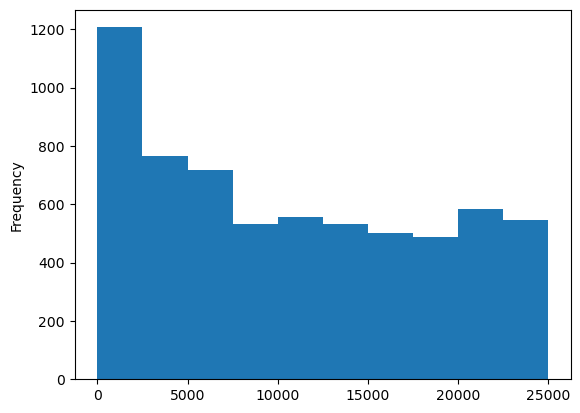

In [71]:
stack_new[stack_new.ConvertedCompYearly<25000].ConvertedCompYearly.plot.hist()

In [72]:
stack_new.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [73]:
stack_new['Currency'].unique()

array(['USD\tUnited States dollar', 'PHP\tPhilippine peso',
       'GBP\tPound sterling', 'EUR European Euro',
       'AUD\tAustralian dollar', 'SEK\tSwedish krona',
       'AMD\tArmenian dram', 'ZAR\tSouth African rand',
       'BRL\tBrazilian real', 'BDT\tBangladeshi taka',
       'CAD\tCanadian dollar', 'CHF\tSwiss franc',
       'LKR\tSri Lankan rupee', 'INR\tIndian rupee', 'RUB\tRussian ruble',
       'SGD\tSingapore dollar', 'TRY\tTurkish lira',
       'NOK\tNorwegian krone', 'RSD\tSerbian dinar', 'PLN\tPolish zloty',
       'IRR\tIranian rial', 'NPR\tNepalese rupee', 'RON\tRomanian leu',
       'DKK\tDanish krone', 'HUF\tHungarian forint',
       'KRW\tSouth Korean won', 'CNY\tChinese Yuan Renminbi',
       'VND\tVietnamese dong', 'ILS\tIsraeli new shekel',
       'DOP\tDominican peso', 'EGP\tEgyptian pound',
       'UAH\tUkrainian hryvnia', 'UZS\tUzbekistani som',
       'IDR\tIndonesian rupiah', 'GEL\tGeorgian lari',
       'XOF\tWest African CFA franc', 'VES\tVenezuelan boliv

In [74]:
stack_new['Currency'].value_counts().head(10)

USD\tUnited States dollar    13542
EUR European Euro            13359
GBP\tPound sterling           3575
CAD\tCanadian dollar          2088
INR\tIndian rupee             1831
AUD\tAustralian dollar        1212
BRL\tBrazilian real           1168
PLN\tPolish zloty             1137
SEK\tSwedish krona            1043
CHF\tSwiss franc               671
Name: Currency, dtype: int64

In [75]:
stack_new.ConvertedCompYearly.describe()

count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

In [ ]:
#1. Convert currencies to $
#1.1 Select the top 10 currencies/
#1.2 Convert those currencies by finding conversion rates manually ". Currency times exchange rate = new currency
OR
#1.1. Use Forex Package "https://github.com/MicroPyramid/forex-python"
#2. How does country or continent, education level, experience etc affect the salary? Use pandas groupby

In [76]:
# Exchange rate (October 06,2023), IMF https://www.imf.org/external/np/fin/data/rms_mth.aspx?reportType=REP
conversion_rates = {
    'USD\tUnited States dollar': 1.000000, 
    'EUR European Euro': 1.056300, 
    'GBP\tPound sterling': 1.221150, 
    'CAD\tCanadian dollar': 1.368300, 
    'INR\tIndian rupee': 83.238800,
    'AUD\tAustralian dollar': 0.636800,
    'BRL\tBrazilian real': 5.191200, 
    'PLN\tPolish zloty': 4.360800,
    'SEK\tSwedish krona': 11.018300, 
    'CHF\tSwiss franc': 0.912350
} 

In [77]:
# Filter the dataset to keep only the selected currencies
selected_currencies = ['USD\tUnited States dollar','EUR European Euro', 'GBP\tPound sterling', 'CAD\tCanadian dollar', 'INR\tIndian rupee', 'AUD\tAustralian dollar', 'BRL\tBrazilian real', 'PLN\tPolish zloty', 'SEK\tSwedish krona', 'CHF\tSwiss franc']
stack_new = stack_new[stack_new['Currency'].isin(selected_currencies)]

In [ ]:
# Merge the dataset with the conversion rates based on the 'Currency' column
stack_new = stack_new.merge(pd.DataFrame.from_dict(conversion_rates, orient='index', columns=['ConversionRate']), left_on='Currency', right_index=True)

In [ ]:
# Calculate the converted yearly compensation in USD
stack_new['ConvertedCompUSD'] = stack_new['ConvertedCompYearly'] * stack_new['ConversionRate']

In [ ]:
# Drop the 'Currency' and 'ConversionRate' columns if no longer needed
stack_new = stack_new.drop(['Currency', 'ConversionRate'], axis=1)

# Display the resulting DataFrame
print(stack_new)

In [ ]:
# Define the independent variables (factors) and the dependent variable
X = stack_new[['Country', 'EdLevel', 'YearsCode']]
y = stack_new['ConvertedCompYearly']

# Encode categorical variables (Country and EducationLevel) using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Country', 'EdLevel'], drop_first=True)

# Add a constant term for the intercept
X_encoded = sm.add_constant(X_encoded)

# Fit the multiple linear regression model
model = sm.OLS(y, X_encoded).fit()

# Get the regression summary
print(model.summary())